In [2]:
import numpy as np
import os
from os.path import join

# created tools
from master_lib.utils.files_and_directories import load_json, list_train_images
from master_lib.image_processing.processing import load_dicom_image, get_bbox_ranges
import tempfile

# medical readers

In [17]:
dataset_path = r'C:\Users\MikołajStryja\Documents\Studia\siim-covid19-detection'
dataset_descrption_path = os.path.join(os.path.abspath(os.getcwd()), 'dataset.json')
dataset = load_json(dataset_descrption_path)
train = list_train_images(dataset_path)

In [4]:
example = dataset[os.path.basename(train[8])]

In [9]:
boxes = example['boxes']
boxes
bbox = get_bbox_ranges(boxes[0])
bbox

(640, 1543, 0, 1841)

In [6]:
example_img = load_dicom_image(train[8])

In [12]:
example_img.shape

(3480, 4248)

In [11]:
mask = np.zeros(shape=example_img.shape)
mask[bbox[0]:bbox[1], bbox[2]:bbox[3]] = 255

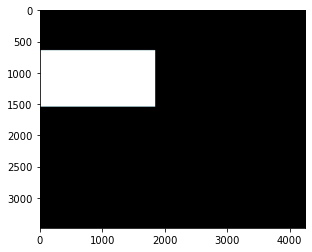

In [15]:
import matplotlib.pyplot as plt
plt.imshow(mask, cmap=plt.cm.bone)

(3480, 4248)

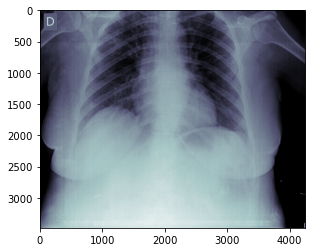

In [24]:
plt.imshow(example_img, cmap=plt.cm.bone)
example_img.shape

In [36]:
def generate_mask(dataset_element: dict, image_path: str):
    img = load_dicom_image(image_path)
    mask = np.zeros(shape=img.shape)
    boxes = dataset_element['boxes']
    for box in boxes:
        bbox = get_bbox_ranges(box)
        print(bbox)
        mask[bbox[2]:bbox[3], bbox[0]:bbox[1]] = 255

    return mask

In [37]:
mask2 = generate_mask(dataset[os.path.basename(train[20])], train[20])

(127, 557, 456, 950)
(868, 1150, 498, 934)


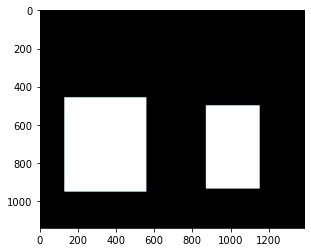

In [38]:
plt.imshow(mask2, cmap=plt.cm.bone)

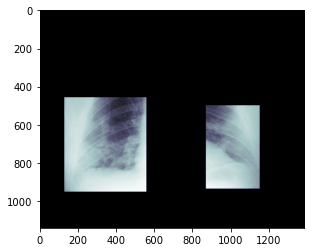

In [48]:
# plt.imshow(load_dicom_image(train[20]), cmap=plt.cm.bone)
dcm = load_dicom_image(train[20])
dcm1 = dcm.copy()
dcm1[mask2 == 0] = 0
dcm1[mask2 != 0] = dcm[mask2 != 0]
plt.imshow(dcm1, cmap=plt.cm.bone)

In [55]:
def evaluate_mask_on_img(img: np.ndarray, mask: np.ndarray):
    assert img.shape == mask.shape
    img_handler = img.copy()
    img_handler[mask == 0] = 0
    img_handler[mask != 0] = img[mask != 0]
    return img_handler


In [59]:
A = evaluate_mask_on_img(dcm, mask2)

(667, 1698, 1161, 1904)
(2136, 2652, 1360, 1804)


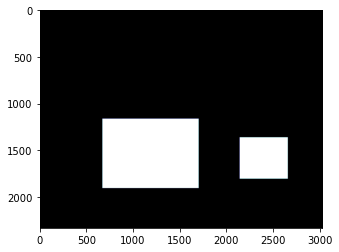

In [60]:
mask3 = generate_mask(dataset[os.path.basename(train[7])], train[7])
plt.imshow(mask3, cmap=plt.cm.bone)

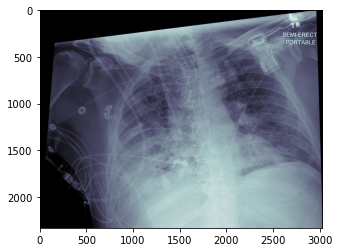

In [61]:
plt.imshow(load_dicom_image(train[7]), cmap=plt.cm.bone)

In [62]:
B = evaluate_mask_on_img(load_dicom_image(train[7]), mask3)

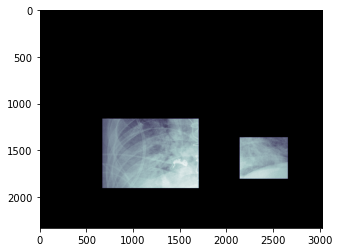

In [63]:
plt.imshow(B, cmap=plt.cm.bone)

In [64]:
len(train)

6054

In [91]:
from PIL import Image
def resize(array, size, keep_ratio=False, resample=Image.LANCZOS):
    # Original from: https://www.kaggle.com/xhlulu/vinbigdata-process-and-resize-to-image
    im = Image.fromarray(array)
    
    if keep_ratio:
        im.thumbnail((size, size), resample)
    else:
        im = im.resize((size, size), resample)
    return np.asarray(im)

In [92]:
arr = load_dicom_image(train[10])
mask = generate_mask(dataset[os.path.basename(train[10])], train[10])

(945, 1408, 645, 1665)
(2726, 3092, 907, 1718)


In [93]:
resized = resize(arr, 512)
resized_mask = resize(mask, 512)

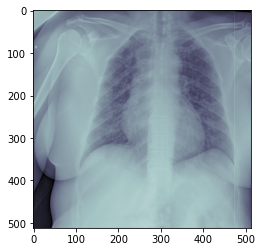

In [94]:
plt.imshow(resized, cmap=plt.cm.bone)

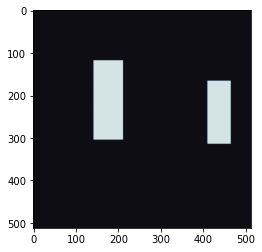

In [95]:
plt.imshow(resized_mask, cmap=plt.cm.bone)

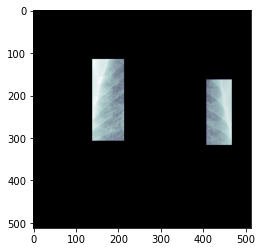

In [98]:
C = evaluate_mask_on_img(resized, resized_mask)
plt.imshow(C, cmap=plt.cm.bone)

In [73]:
#from mrcnn.model import MaskRCNN
import keras